# __How Do People Feel About New Video Games Versus Old Video Games?__

## __Alexander Buckler 12/10/2024__

_In today's age, video games are an extremely common hobby around the world. It can provide a sense of fun, distraction, and community for the people who play them. However, I have noticed that a lot of people will say negative things about modern gaming. They say that "new games are bad" and "the games don't have spirit in them", and "gaming used to be good". This got me wondering, are new games actually as unfavorable as older games? I want to find out whether or not modern video games are actually as unfavorable as people seem to say, or if people are looking at older games with rose tinted glasses._

_To do this, I will be comparing the reviews of games from the video game review site GameSpot to get a general consensus on how people feel about old versus new video games._

I will start off by importing the tools that I need to complete this analysis.

In [76]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import urllib
import requests
import numpy as np

# __Retrieving the API Endpoints and Data__

In [3]:
api_key = pd.read_csv(r"C:\Users\Alex Buckler\data_SKOOBY\GamesKey.txt")
key_s = api_key['GamesKey'].iloc[0]

I got stuck when it came to actually finding a usable api for actual video game scores, which is what this analysis is going to be based on. I initially was going to use Steam to compare the like to dislaike ratios for games but I could not get into the api. Then I tried to find an api for the game and movie review site metacritic, but there was not an available api for metacritic. Luckily, GameSpot had an official api that I could use.

The two cells below are me trying to pull the endpoints from the api. I do this by essentially constructing the url with the boundaries of data that I want to pull. In the filters, I chose to pull from two seperate timeframes for video game review data. One is for older video games from the yars 2000 to 2010. The second timeframe is from the years 2010 to the present. This way, I can roughly see how game review scores were from these time frames.

In [4]:
header = {'User-agent': 'Mozilla/5.0'}
reviews_e = 'http://www.gamespot.com/api/reviews/'
url_key = '?api_key=' + key_s
url_format = '&format=json'

In [5]:
url_sort_asc = '&sort=score:asc'
url_sort_desc = '&sort=score:desc'
url_filter_past ='&filter=publish_date:2000-01-01|2010-01-01'
url_filter_present ='&filter=publish_date:2010-01-02|2024-12-03'

The below 4 cells are me taking data for the top and bottom 100 scores from both the past and present games. The thing about the GameSpot API is that it limits the amount of results it can generate to only 100. I initially wanted to pull a set of random game scores from a set of games, but I decided to reorient myself to choosing the top and bottom 100 scores of past and present games to compare how they fare against each other.

In [78]:
response1 = requests.get(reviews_e + url_key + url_format + url_sort_asc + url_filter_past, headers = header)
response1.status_code

200

In [67]:
response2 = requests.get(reviews_e + url_key + url_format + url_sort_desc + url_filter_past, headers = header)
response2.status_code

200

In [68]:
response3 = requests.get(reviews_e + url_key + url_format + url_sort_asc + url_filter_present, headers = header)
response3.status_code

200

In [69]:
response4 = requests.get(reviews_e + url_key + url_format + url_sort_desc + url_filter_present, headers = header)
response4.status_code

503

A challenge that came up was that I initially only had one request that was going to try and search for a mass of data to analyze and compare. However, the issue was that it only generated the top or bottom scores of 100 results, so it was not going to be truly randomized like I wanted it to be. Because of this, I had to make 4 requests that represent the top and bottom 100 scores for games from the years 2000 to 2010, and from the years 2010 to the present. But now that I know that I am getting responses for each of my endpoints, I can start digging into the endpoints to start finding the data that I need. I can start by looking at the categories that I can look through. I'm going to look through the keys since they are all dictionaries and find where the data I need is located.

In [15]:
response_dict1 = json.loads(response1.text)
response_dict1.keys()
#pd.DataFrame(response_dict['error'])

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

In [16]:
response_dict2 = json.loads(response2.text)
response_dict2.keys()

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

In [17]:
response_dict3 = json.loads(response3.text)
response_dict3.keys()

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

In [18]:
response_dict4 = json.loads(response4.text)
response_dict4.keys()

dict_keys(['error', 'limit', 'offset', 'number_of_page_results', 'number_of_total_results', 'status_code', 'results', 'version'])

The only key that contained any valuable data was the 'results' key, as the other categories just contained simple information like the search parameters and the status code for the search.

In [ ]:
df1 = pd.DataFrame(response_dict1['results'])
df1.head()

In [ ]:
df2 = pd.DataFrame(response_dict2['results'])
df2.head()

In [ ]:
df3 = pd.DataFrame(response_dict3['results'])
df3.head()

In [ ]:
df4 = pd.DataFrame(response_dict4['results'])
df4.head()

Now that I know that the DataFrames are bringing up correct results as intended, I concatinate them to group them into either my past or present data that I will use later on.

In [23]:
data_past = pd.concat([df1, df2])
data_past

,publish_date,update_date,review_type,id,authors,title,image,score,deck,good,bad,body,lede,game,releases,site_detail_url,videos_api_url
0,2005-08-25 03:52:00,2006-08-29 01:19:19,primary,6152120,Greg Mueller,Super Collapse! II Review,{'square_tiny': 'https://www.gamespot.com/a/up...,0.0,"With four different game modes, Super Collapse...","Fun, addictive gameplay|Four puzzle modes to c...",Only 10 puzzles in puzzle mode|Music gets repe...,"<p> Super Collapse! II is a fast-paced, addic...","With four different game modes, Super Collapse...","{'id': 21196, 'name': 'Super Collapse II', 'ap...","[{'upc': None, 'distribution_type': 'Online', ...",https://www.gamespot.com/reviews/super-collaps...,NaN
1,2004-01-14 05:45:11,2004-01-14 05:45:11,primary,6086528,Alex Navarro,Big Rigs: Over the Road Racing Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.0,Just how bad is Big Rigs: Over the Road Racing...,,,"<p> Bad games are released all the time, and ...",Just how bad is Big Rigs: Over the Road Racing...,"{'id': 20030, 'name': 'Big Rigs: Over the Road...","[{'upc': '834656000905', 'distribution_type': ...",https://www.gamespot.com/reviews/big-rigs-over...,https://www.gamespot.com/api/videos/?filter=id...
2,2003-03-18 02:31:17,2003-03-18 02:31:17,primary,6023405,Andrew Park,Gods and Generals Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.2,It's difficult to imagine that Gods and Genera...,,,<p> You've probably heard from someone before ...,It's difficult to imagine that Gods and Genera...,"{'id': 18138, 'name': 'Gods and Generals', 'ap...","[{'upc': '047875312791', 'distribution_type': ...",https://www.gamespot.com/reviews/gods-and-gene...,https://www.gamespot.com/api/videos/?filter=id...
3,2003-03-25 04:12:15,2003-03-25 04:12:15,primary,6023928,Ryan Davis,Dragon Ball Z Ultimate Battle 22 Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.2,"If you're unfamiliar with Dragon Ball Z, you'r...",,,<p> Since there's probably some confusion abou...,"If you're unfamiliar with Dragon Ball Z, you'r...","{'id': 10162, 'name': 'Dragon Ball Z: Ultimate...","[{'upc': '742725246638', 'distribution_type': ...",https://www.gamespot.com/reviews/dragon-ball-z...,https://www.gamespot.com/api/videos/?filter=id...
4,2001-05-01 06:04:11,2006-05-17 03:09:03,primary,2714466,Jeff Gerstmann,KISS Pinball Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.3,KISS fans will be disappointed by the distinct...,,,<p>KISS Pinball is the latest in Take-Two Inte...,KISS fans will be disappointed by the distinct...,"{'id': 3492, 'name': 'KISS Pinball', 'api_deta...","[{'upc': '710425230776', 'distribution_type': ...",https://www.gamespot.com/reviews/kiss-pinball-...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2006-03-25 04:26:47,2006-03-25 04:26:47,primary,6146661,Greg Kasavin,The Elder Scrolls IV: Oblivion Review,{'square_tiny': 'https://www.gamespot.com/a/up...,9.3,The Elder Scrolls IV: Oblivion is simply one o...,"Huge, lavishly detailed world offers tremendou...",Frequent though fairly brief loading times|You...,<p> This is a rare and remarkable achievement...,The Elder Scrolls IV: Oblivion is simply one o...,"{'id': 22229, 'name': 'The Elder Scrolls IV: O...","[{'upc': '5026555039765', 'distribution_type':...",https://www.gamespot.com/reviews/the-elder-scr...,https://www.gamespot.com/api/videos/?filter=id...
96,2001-11-19 06:15:03,2001-11-19 06:15:03,primary,2825778,Gord Goble,FIFA 2002 Review,{'square_tiny': 'https://www.gamespot.com/a/up...,9.3,Fans of real-life soccer will find this the mo...,,,<p>Those who hammer the buttons on their gamep...,Fans of real-life soccer will find this the mo...,"{'id': 3798, 'name': 'FIFA 2002', 'api_detail_...","[{'upc': '014633143287', 'distribution_type': ...",https://www.gamespot.com/reviews/fifa-2002-rev...,NaN
97,2005-02-04 06:00:12,2006-05-17 03:08:41,secondary,6118013,Justin Calvert,World Soccer Winning Eleven 8 International Re...,{'square_tiny': 'https://

The purpose of the below cell here was going to not only drop the unimportant parts of the DataFrame, but it was also going to reorganize the DataFrame so that it properly grabs the game ID for each review. This was intended to be used to try and see which groups of games had the best or worst review results, but I ultimately decided against it when it wouldn't work as intended since it did not feel like it would be relevant to what I was trying to accomplish. What I did accomplish below was the removal of unnecessary information in my DataFrame so that it is easier to look at and understand.

In [42]:
data_past_final = data_past.drop(columns = ['review_type', 'deck', 'body', 'lede', 'image', 'videos_api_url', 'site_detail_url'])
#t_response_df = pd.DataFrame(t_response['game'].to_list())
#t_response['game_id'] = t_response_df['id']
#t_response['game_name'] = t_response_df['name']
data_past_final

,publish_date,update_date,id,authors,title,score,good,bad,game,releases
0,2005-08-25 03:52:00,2006-08-29 01:19:19,6152120,Greg Mueller,Super Collapse! II Review,0.0,"Fun, addictive gameplay|Four puzzle modes to c...",Only 10 puzzles in puzzle mode|Music gets repe...,"{'id': 21196, 'name': 'Super Collapse II', 'ap...","[{'upc': None, 'distribution_type': 'Online', ..."
1,2004-01-14 05:45:11,2004-01-14 05:45:11,6086528,Alex Navarro,Big Rigs: Over the Road Racing Review,1.0,,,"{'id': 20030, 'name': 'Big Rigs: Over the Road...","[{'upc': '834656000905', 'distribution_type': ..."
2,2003-03-18 02:31:17,2003-03-18 02:31:17,6023405,Andrew Park,Gods and Generals Review,1.2,,,"{'id': 18138, 'name': 'Gods and Generals', 'ap...","[{'upc': '047875312791', 'distribution_type': ..."
3,2003-03-25 04:12:15,2003-03-25 04:12:15,6023928,Ryan Davis,Dragon Ball Z Ultimate Battle 22 Review,1.2,,,"{'id': 10162, 'name': 'Dragon Ball Z: Ultimate...","[{'upc': '742725246638', 'distribution_type': ..."
4,2001-05-01 06:04:11,2006-05-17 03:09:03,2714466,Jeff Gerstmann,KISS Pinball Review,1.3,,,"{'id': 3492, 'name': 'KISS Pinball', 'api_deta...","[{'upc': '710425230776', 'distribution_type': ..."
...,...,...,...,...,...,...,...,...,...,...
95,2006-03-25 04:26:47,2006-03-25 04:26:47,6146661,Greg Kasavin,The Elder Scrolls IV: Oblivion Review,9.3,"Huge, lavishly detailed world offers tremendou...",Frequent though fairly brief loading times|You...,"{'id': 22229, 'name': 'The Elder Scrolls IV: O...","[{'upc': '5026555039765', 'distribution_type':..."
96,2001-11-19 06:15:03,2001-11-19 06:15:03,2825778,Gord Goble,FIFA 2002 Review,9.3,,,"{'id': 3798, 'name': 'FIFA 2002', 'api_detail_...","[{'upc': '014633143287', 'distribution_type': ..."
97,2005-02-04 06:00:12,2006-05-17 03:08:41,6118013,Justin Calvert,World Soccer Winning Eleven 8 International Re...,9.3,Excellent career mode|Believable ball physics ...,Lots of unlicensed teams|No Bolton Wanderers,"{'id': 20995, 'name': 'World Soccer Winning El...","[{'upc': None, 'distribution_type': 'Retail', ..."
98,2005-10-24 05:54:00,2005-10-24 05:54:00,6136415,Greg Kasavin,Resident Evil 4 Review,9.3,Incredibly amazing audiovisual presentation|Ex...,Some uncharacteristically goofy dialogue|A cou...,"{'id': 3941, 'name': 'Resident Evil 4 (2005)',...","[{'upc': '4976219038546', 'distribution_type':..."


In [25]:
data_pres = pd.concat([df3, df4])
data_pres

,publish_date,update_date,review_type,id,authors,title,image,score,deck,good,bad,body,lede,game,releases,site_detail_url,videos_api_url,movie,television
0,2022-04-18 07:00:00,2022-04-18 09:53:53,primary,6417864,Richard Wakeling,Postal 4: No Regerts Review - Nothing But Regrets,{'square_tiny': 'https://www.gamespot.com/a/up...,1.0,Postal 4: No Regerts is an abysmal video game ...,The voice acting is surprisingly decent|At som...,Enemy AI is dumb and fundamentally broken|Comb...,"<p dir=""ltr"">The Steam page for open-world fir...",Postal 4: No Regerts is an abysmal video game ...,"{'id': 503272, 'name': 'POSTAL 4: No Regerts',...","[{'upc': None, 'distribution_type': 'Steam', '...",https://www.gamespot.com/reviews/postal-4-no-r...,NaN,NaN,NaN
1,2013-07-11 05:18:45,2013-07-11 06:34:07,primary,6411189,Gamespot Staff,Ride to Hell: Retribution Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.0,"Ride to Hell: Retribution is a hideous, slappe...",,Some of the worst voice acting imaginable|Awfu...,"<p> Much like with terrible movies and songs,...","Ride to Hell: Retribution is a hideous, slappe...","{'id': 38059, 'name': 'Ride to Hell: Retributi...","[{'upc': '4020628511586', 'distribution_type':...",https://www.gamespot.com/reviews/ride-to-hell-...,https://www.gamespot.com/api/videos/?filter=id...,NaN,NaN
2,2015-02-09 05:32:00,2015-02-09 05:33:03,primary,6416027,Don Saas,Raven's Cry Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.0,A game where its most tolerable moments are te...,,"Constant crashes, including a bug which kills ...","<p>Gather 'round, ye sons and daughters of lan...",But I don't want to be a pirate!,"{'id': 107439, 'name': 'Raven's Cry', 'api_det...","[{'upc': None, 'distribution_type': 'Steam', '...",https://www.gamespot.com/reviews/raven-s-cry-r...,NaN,NaN,NaN
3,2014-05-28 11:57:00,2014-05-28 11:58:19,primary,6415776,Kevin VanOrd,Air Control Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.0,"Air Control is 30 minutes worth of horrific, b...",,"Busted interface, busted mouselook, busted mou...",<p>Three ugly character models sit around a fi...,Systems failure.,"{'id': 244798, 'name': 'Air Control', 'api_det...","[{'upc': None, 'distribution_type': 'Desura', ...",https://www.gamespot.com/reviews/air-control-r...,NaN,NaN,NaN
4,2013-06-28 06:34:00,2013-10-09 01:05:41,primary,6410885,Shaun McInnis,Motorbike Review,{'square_tiny': 'https://www.gamespot.com/a/up...,1.5,Motorbike is a cruel joke of a game that no Pl...,,Wildly unpredictable physics|Abysmal track des...,"<p>To call Motorbike a <a href=""https://www.ga...",Motorbike is a cruel joke of a game that no Pl...,"{'id': 129862, 'name': 'Motorbike', 'api_detai...","[{'upc': None, 'distribution_type': 'PlayStati...",https://www.gamespot.com/reviews/motorbike-rev...,https://www.gamespot.com/api/videos/?filter=id...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-06-03 03:28:39,2011-06-03 03:28:39,secondary,6316956,Justin Calvert,Dirt 3 Review,{'square_tiny': 'https://www.gamespot.com/a/up...,9.0,Dirt 3 is a superb off-road racer that adds so...,New event types add even more variety to both ...,YouTube functionality is limited,"<p> When <a href=""https://www.gamespot.com/"" ...",Dirt 3 is a superb off-road racer that adds so...,"{'id': 81568, 'name': 'DiRT 3', 'api_detail_ur...","[{'upc': None, 'distribution_type': 'PlayStati...",https://www.gamespot.com/reviews/dirt-3-review...,https://www.gamespot.com/api/videos/?filter=id...,NaN,NaN
96,2011-05-31 03:34:22,2011-05-31 03:34:22,secondary,6316260,Justin Calvert,DiRT 3 Review,{'square_tiny': 'https://www.gamespot.com/a/up...,9.0,Dirt 3 is a superb off-road racer that adds so...,New event types add even more variety to both ...,YouTube functionality is limited,"<p> When <a href=""https://www.gamespot.com/"" ...",Dirt 3 is a superb off-road racer that adds so...,"{'id': 81568, 'name': 'DiRT 3', 'api_detail_ur...","[{'upc': None, 'distribution_t

In [40]:
data_pres_final = data_pres.drop(columns = ['review_type', 'deck', 'body', 'lede', 'image', 'movie', 'television', 'videos_api_url', 'site_detail_url'])
#t_response1 = t_response1.dropna()
#t_response_df1 = pd.DataFrame(t_response['game'].to_list())
#t_response1['game_id'] = t_response_df1['id']
#t_response1['game_name'] = t_response_df1['name']
data_pres_final

,publish_date,update_date,id,authors,title,score,good,bad,game,releases
0,2022-04-18 07:00:00,2022-04-18 09:53:53,6417864,Richard Wakeling,Postal 4: No Regerts Review - Nothing But Regrets,1.0,The voice acting is surprisingly decent|At som...,Enemy AI is dumb and fundamentally broken|Comb...,"{'id': 503272, 'name': 'POSTAL 4: No Regerts',...","[{'upc': None, 'distribution_type': 'Steam', '..."
1,2013-07-11 05:18:45,2013-07-11 06:34:07,6411189,Gamespot Staff,Ride to Hell: Retribution Review,1.0,,Some of the worst voice acting imaginable|Awfu...,"{'id': 38059, 'name': 'Ride to Hell: Retributi...","[{'upc': '4020628511586', 'distribution_type':..."
2,2015-02-09 05:32:00,2015-02-09 05:33:03,6416027,Don Saas,Raven's Cry Review,1.0,,"Constant crashes, including a bug which kills ...","{'id': 107439, 'name': 'Raven's Cry', 'api_det...","[{'upc': None, 'distribution_type': 'Steam', '..."
3,2014-05-28 11:57:00,2014-05-28 11:58:19,6415776,Kevin VanOrd,Air Control Review,1.0,,"Busted interface, busted mouselook, busted mou...","{'id': 244798, 'name': 'Air Control', 'api_det...","[{'upc': None, 'distribution_type': 'Desura', ..."
4,2013-06-28 06:34:00,2013-10-09 01:05:41,6410885,Shaun McInnis,Motorbike Review,1.5,,Wildly unpredictable physics|Abysmal track des...,"{'id': 129862, 'name': 'Motorbike', 'api_detai...","[{'upc': None, 'distribution_type': 'PlayStati..."
...,...,...,...,...,...,...,...,...,...,...
95,2011-06-03 03:28:39,2011-06-03 03:28:39,6316956,Justin Calvert,Dirt 3 Review,9.0,New event types add even more variety to both ...,YouTube functionality is limited,"{'id': 81568, 'name': 'DiRT 3', 'api_detail_ur...","[{'upc': None, 'distribution_type': 'PlayStati..."
96,2011-05-31 03:34:22,2011-05-31 03:34:22,6316260,Justin Calvert,DiRT 3 Review,9.0,New event types add even more variety to both ...,YouTube functionality is limited,"{'id': 81568, 'name': 'DiRT 3', 'api_detail_ur...","[{'upc': None, 'distribution_type': 'Retail', ..."
97,2011-05-23 05:48:30,2011-05-23 05:48:30,6315203,Justin Calvert,DiRT 3 Review,9.0,New event types add even more variety to both ...,YouTube functionality is limited,"{'id': 81568, 'name': 'DiRT 3', 'api_detail_ur...","[{'upc': None, 'distribution_type': 'Games on ..."
98,2011-05-23 07:32:52,2011-05-23 07:32:52,6314759,Kevin VanOrd,The Witcher 2: Assassins of Kings Review,9.0,Morally ambiguous choices lead to game-changin...,A variety of bugs|Combat sometimes ventures in...,"{'id': 56977, 'name': 'The Witcher 2: Assassin...","[{'upc': None, 'distribution_type': 'Steam', '..."


# __Using the Collected Data__

Now that the DataFrames are set up with the needed scores, I can put them into a histogram as a visual representation of the data. To start, the below two cells are meant to help change the type of the values of the score category. The way that the DataFrame has the values of the score category is that they're not recognized as real numbers in a graph or a plot. It was giving me an error when trying to use just score, so I had to change it so that the program would recognize the values as real numbers to put in a histogram.

In [50]:
df1['score_i'] = df1['score'].astype('float64')
df2['score_i'] = df2['score'].astype('float64')

In [52]:
df3['score_i'] = df3['score'].astype('float64')
df4['score_i'] = df4['score'].astype('float64')

To create the histogram, I used the updated version of the scores to be put onto histograms to map out the concentrations of scores. I also enable the grid just to make it a little easier to see where certain values lie on the histograms. The rest of the code after the grid allows me to set titles for the collection of histograms, the individual histograms, and the axes on the histograms.

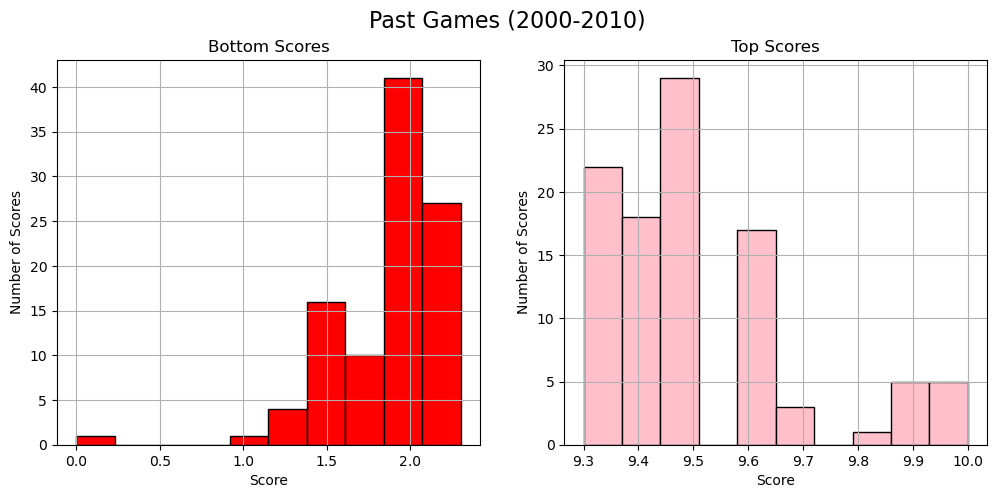

In [65]:
fig1, ax1 = plt.subplots(1,2, figsize = (12,5))

ax1[0].hist(df1['score_i'], color = 'red', edgecolor = 'black')
ax1[1].hist(df2['score_i'], color = 'pink', edgecolor = 'black')

ax1[0].grid(True)
ax1[1].grid(True)

plt.suptitle('Past Games (2000-2010)', fontsize=16)

ax1[0].set_title('Bottom Scores')
ax1[1].set_title('Top Scores')

ax1[0].set_xlabel('Score')
ax1[0].set_ylabel('Number of Scores')


ax1[1].set_xlabel('Score')
ax1[1].set_ylabel('Number of Scores')

plt.show()

These histograms show some interesting points that can be made about video games from 2000-2010. These are the games that a lot of people say are some of the best years for video games. An interesting observation that can be made about these histograms is that there is a larger concentration of reviews on a low score than a high score, however there are also more review scores that are on the extreme high end of the score spectrum than the low end. Also, the higher end of scores are spread out farther across score numbers than the lower end of the scores. This could mean a couple things. This could mean that there were more games with unfavorable ratings. But it could also mean that there was a spotted shift when going up the ranks of scores, and it cannot be seen due to the parameters of the API.

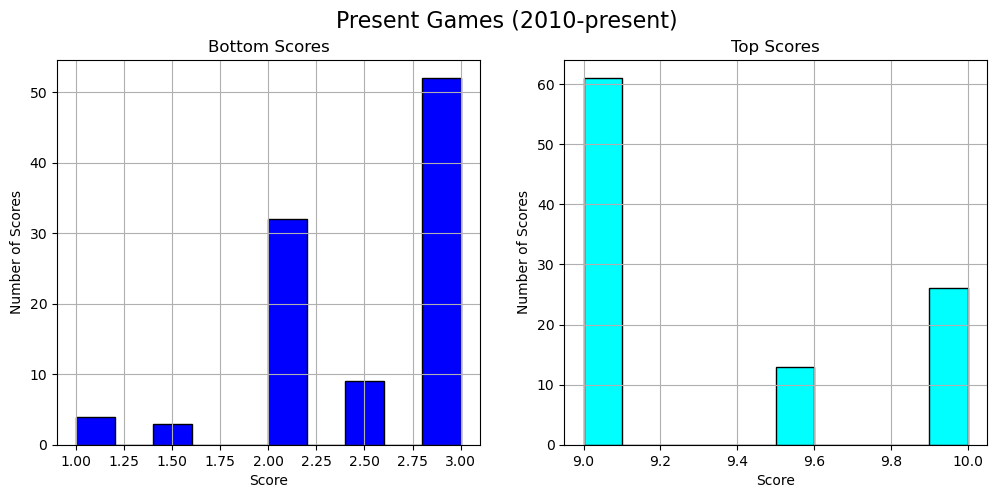

In [63]:
fig2, ax2 = plt.subplots(1,2, figsize = (12,5))

ax2[0].hist(df3['score_i'], color = 'blue', edgecolor = 'black')
ax2[1].hist(df4['score_i'], color = 'cyan', edgecolor = 'black')
ax2[0].grid(True)
ax2[1].grid(True)

plt.suptitle('Present Games (2010-present)', fontsize=16)


ax2[0].set_title('Bottom Scores')
ax2[1].set_title('Top Scores')

ax2[0].set_xlabel('Score')
ax2[0].set_ylabel('Number of Scores')

ax2[1].set_xlabel('Score')
ax2[1].set_ylabel('Number of Scores')

plt.show()

For the present data, there can also be some interesting observations made about the histograms. The most noticable to me is that these plots have a lot less score variety than the data for past video games. Why this is this way is very curious to me. This could represent a shift in the cuture behind video game reviewing, as more and more games came out, the less detailed the reviews for the games got, or maybe the scoring system for games has started to narrow down to whole numbers as time went on. An interesting observation that I would like to point out is that there are more scores on the bottom end of the score spectrum that are farther above 2, which is where a lot of the scores for past games ended up. This could mean that there are slightly better video games now than there were 15 years ago.

In [53]:
data_past_final['score_i'] = data_past_final['score'].astype('float64')
data_pres_final['score_i'] = data_pres_final['score'].astype('float64')
data_past_final['score_i']

0     0.0
1     1.0
2     1.2
3     1.2
4     1.3
     ... 
95    9.3
96    9.3
97    9.3
98    9.3
99    9.3
Name: score_i, Length: 200, dtype: float64

Following a similar pattern from what I did above with the individual data sets, I am now using the combined data sets for past and present video games and turning their scores into values that can be plotted.

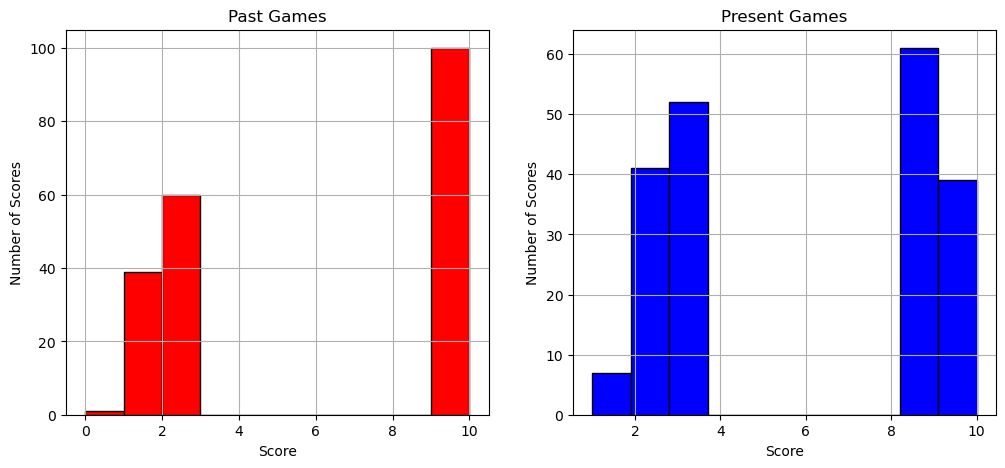

In [56]:
fig3, ax3 = plt.subplots(1,2, figsize = (12,5))

ax3[0].hist(data_past_final['score_i'], color = 'red', edgecolor = 'black')
ax3[1].hist(data_pres_final['score_i'], color = 'blue', edgecolor = 'black')
ax3[0].grid(True)
ax3[1].grid(True)

ax3[0].set_title('Past Games')
ax3[1].set_title('Present Games')

ax3[0].set_xlabel('Score')
ax3[0].set_ylabel('Number of Scores')

ax3[1].set_xlabel('Score')
ax3[1].set_ylabel('Number of Scores')

plt.show()

Juxtaposing the two timeframes together can help to put the data into perspective. Immediately, an observation that I wanted to point out is that there is a larger ratio of games that are on the lower end of the spectrum with present games than there is for past games. Additionally, there are much more scores of 9.5s-10s for past games than for present games, which are more around the 9.0 mark. This very well could be indicative that past video games were more favorable than present video games. However, the scores on the low end of the spectrum for past games were lower than the ones for present games.

# __Conclusion__

The results from this analysis can point to several things. The data shows that there is a higher concentration of lower ranked scores in past video games compared to present video games, but there is also a higher concentration of 9.5-10 scores in past video games compared to present video games. When looking at the plots and the datasets, I believe that people feel very similar about older games versus newer games. This can be shown with the shapes of the graphs as well as the ratios between positive and negative reviews. Despite the lower reviews for older games being slightly lower than reviews for present games, it seems that both past and present games stand on similar footing when it comes to the scores that they recieve.

The intitial purpose of this analysis was to answer the question of whether or not people felt better about older games versus newer games. What did we find out from this? Well, I cannot say that this question was answered effectively, but there are important aforementioned takeaways from the presented data. Something that I find important in this analysis is that everything is subjective. When a person plays a game, their experience of it is dependent on factors that might not be in the game's control, like player experience with video games or age. But the score that is given to these games is entirely based on the person that is playing it and how they feel about the game. It can be very difficult to derive detailed meaning from these scores when there is not a given explanation behind the number as would a simple like or dislike button.

I believe that main problem and limitation that arises from this dataset is the limititations of the API. As I stated before, the GameSpot API was not my first choice, as I had tried both Steam and MetaCritic for APIs to use. I feel that the limitations of the API to the top or bottom 100 scores really limit the full scale of how people feel about video games. Being able to see the middle ground where a huge chunk of reviews would be found would have helped to draw more meaningful conclusions. What would have helped is to find an API that grants more freedom when it comes to data collecting. Additionally, having the data be a range of numbers from 1-10 can make more robust datasets, but it makes it difficult to derive meaning from. I feel that an API that measures between ONLY whether people did or did not like a game would be much more helpful in deriving meaning from the data, since there would be a concrete yes or no on whether someone liked the game. Another issue that limited the data collection and analysis is my own limitations when it comes to coding. I had to have a lot of help and ran into frequent errors. I can figure out how to navigate DataFrames and create them, but manipulating and altering information in the DataFrames was a challenge since it involves so much more understanding of python and how the code and data work. If I were to become a more experienced coder then I would be able to come back to this and figure out more effective methods when it comes to data collection and analysis.